In [5]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
#import seaborn
import calendar

%matplotlib inline

In [20]:
# 株式データの読み込み
def read_csv_data(input_csv_name):
    df = pd.read_csv(input_csv_name,index_col=0)
    df = df.iloc[::-1] #x軸の前後入れ替え
    print("欠損値の確認")
    print(df.isnull().any())    
    return df

In [21]:
# 変化率の文字列をfloatに変換して保存
def add_percentage_data(df):
    percentage = np.zeros(len(df["変化率 %"]))
    for i in range(len(df["変化率 %"])):
        percentage[i] = float(df["変化率 %"].iloc[i].replace("%", ""))
    df.insert(6,'percentage',percentage)


In [37]:
# 各データの相関確認
def draw_scatter_of_stock_data(df):
    fig = plt.figure(figsize=(36,20))
    p1 = fig.add_subplot(3,2,1)
    p1.scatter(df["終値"], df["始値"]) # 散布図を描画
    plt.xlabel("close price",fontsize=50) 
    plt.ylabel("start price",fontsize=50) 
    plt.title("close vs start price scatter",fontsize=50) 
    
    p2 = fig.add_subplot(3,2,2)
    p2.scatter(df["終値"], df["高値"]) # 散布図を描画
    plt.xlabel("close price",fontsize=50) 
    plt.ylabel("max price",fontsize=50) 
    plt.title("close vs max price scatter",fontsize=50) 
    
    p3 = fig.add_subplot(3,2,3)
    p3.scatter(df["終値"], df["安値"]) # 散布図を描画
    plt.xlabel("close price",fontsize=50) 
    plt.ylabel("min price",fontsize=50) 
    plt.title("close vs min price scatter",fontsize=50) 
    
    p4 = fig.add_subplot(3,2,4)
    x = df["出来高"]
    p4.scatter(df["出来高"], df["終値"]) # 散布図を描画
    plt.xlabel("volume",fontsize=50) 
    plt.ylabel("close price",fontsize=50) 
    plt.tight_layout() #ラベルなどが切れないように調整
    plt.title("volume vs close price scatter",fontsize=50) 
    N = len(x) #表示するデータ数
    n = 300 #間隔。この値を調整
    plt.xticks(x[::n], rotation=45, ha='right')
    
    p5 = fig.add_subplot(3,2,5)
    p5.scatter(df["終値"], df["percentage"]) # 散布図を描画
    plt.xlabel("close price",fontsize=50) 
    plt.ylabel("percentage",fontsize=50) 
    plt.title("close price vs percentage scatter",fontsize=50) 
    
    p6 = fig.add_subplot(3,2,6)
    x = df["出来高"]
    p6.scatter(df["出来高"], df["percentage"]) # 散布図を描画
    plt.xlabel("volume",fontsize=50) 
    plt.ylabel("percentage",fontsize=50) 
    plt.tight_layout() #ラベルなどが切れないように調整
    plt.title("volume vs percentage scatter",fontsize=50) 
    N = len(x) #表示するデータ数
    n = 300 #間隔。この値を調整
    plt.xticks(x[::n], rotation=45, ha='right')
    
    fig.savefig("scatter_df.png")
    plt.show()
    plt.close()

In [68]:
# 株価のヒストグラム作成
def draw_stock_hist(df):
    fig = plt.figure(figsize=(36,36))
    p1 = fig.add_subplot(3,2,1)
    p1.hist(df["終値"],bins=100)
    plt.title('close price',fontsize=50)
    plt.xlabel('price count',fontsize=50)
    plt.ylabel('count',fontsize=50)
    p2 = fig.add_subplot(3,2,2)
    p2.hist(df["始値"],bins=100)
    plt.title('start price',fontsize=50)
    plt.xlabel('price count',fontsize=50)
    plt.ylabel('count',fontsize=50)
    p3 = fig.add_subplot(3,2,3)
    p3.hist(df["高値"],bins=100)
    plt.title('highest price',fontsize=50)
    plt.xlabel('price count',fontsize=50)
    plt.ylabel('count')
    p4 = fig.add_subplot(3,2,4)
    p4.hist(df["安値"],bins=100)
    plt.title('lowest price',fontsize=50)
    plt.xlabel('price count',fontsize=50)
    plt.ylabel('count',fontsize=50)
    x = df["出来高"]
    p5 = fig.add_subplot(3,2,5)
    p5.hist(df["出来高"],bins=100)
    plt.title('volume',fontsize=50)
    plt.xlabel('volume count',fontsize=50)
    plt.ylabel('count',fontsize=50)
    N = len(x) #表示するデータ数
    n = 300 #間隔。この値を調整
    plt.xticks(x[::n], rotation=45, ha='right')

    p6 = fig.add_subplot(3,2,6)
    p6.hist(df["percentage"],bins=50)
    plt.title('percentage increase',fontsize=50)
    plt.xlabel('percentage count',fontsize=50)
    plt.ylabel('count',fontsize=50)
    plt.show()
    fig.savefig("stock_hist.png")
    plt.close()




In [61]:
#平均線によるトレンドの把握
def draw_mean_stock(df,plot_days):
    ma_day = [5, 25, 50] # 5日、25日、50日移動平均線
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        df[column_name] = df['終値'].rolling(ma).mean()
    
    plot_plus_len =plot_days    
    whole_data_len = len(df['終値'])
    plot_len = whole_data_len - plot_plus_len #表示するデータの調整
    
    fig = plt.figure(figsize=(16,6))
    plt.title('NTT stock price',fontsize=24)
    x = df.index[plot_len:]
    plt.plot(df.index[plot_len:],df["終値"][plot_len:])
    plt.plot(df['MA for 5 days'][plot_len:], linewidth=1, linestyle='dotted')
    plt.plot(df['MA for 25 days'][plot_len:], linewidth=1)
    plt.plot(df['MA for 50 days'][plot_len:], linewidth=1, linestyle='dotted')
    N = len(x) #表示するデータ数
    n = 30 #間隔。この値を調整
    plt.xticks(x[::n], rotation=45, ha='right')
    
    plt.legend(['NTT stock price','MA for 5 days','MA for 25 days','MA for 50 days'],fontsize=24)
    plt.tight_layout() #ラベルなどが切れないように調整
    plt.ylabel('Price',fontsize=24)
    plt.xlabel('date',fontsize=24)
    
    plt.show()
    fig.savefig("mean_stock.png")
    plt.close()

In [60]:
# 月ごとの変化率の平均値算出
def calc_monthly_mean_percentage(df):
    # indexがDatetimeIndexでない場合のみ変換
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # 全部の年の平均値を集計
    monthly_average_all_years = df[['percentage']].groupby(df.index.month).mean()*100
    monthly_average_all_years.index = [calendar.month_name[i] for i in monthly_average_all_years.index]
    print(monthly_average_all_years)

    # 全部の年の平均値を表示
    fig = plt.figure(figsize=(16,6))
    plt.title('NTT monthly of mean percentage',fontsize=24)
    plt.bar(monthly_average_all_years.index,monthly_average_all_years.values.flatten())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() #ラベルなどが切れないように調整
    plt.ylabel('mean percentage',fontsize=24)
    plt.xlabel('Month',fontsize=24)
    plt.show()
    fig.savefig("monthly_mean_percentage.png")

    plt.close()

In [56]:
# RSIによる異常値の検出
def calc_rsi(df):

    df['RSI'] = ta.rsi(df['終値'], length=14)
    
    # RSIの移動平均（例：14日間の単純移動平均）
    df['RSI_MA_14'] = df['RSI'].rolling(window=14).mean()

    data = df.filter(['終値'])
    dataset = data.values
    plot_plus_len = 365
    whole_data_len = int(np.ceil( len(dataset) ))
    plot_len = whole_data_len - plot_plus_len
    
    # RSIと株価のグラフ
    fig = plt.figure(figsize=(20,16))
    p1 = fig.add_subplot(2,1,1)
    p1.plot(df.index[plot_len:], df['終値'][plot_len:], label='終値')
    plt.title('NTT stock price',fontsize=24)
    plt.xlabel('date',fontsize=24)
    plt.ylabel('price',fontsize=24)

    p2 = fig.add_subplot(2,1,2)
    p2.plot(df.index[plot_len:], df['RSI'][plot_len:], label='RSI')
    p2.plot(df.index[plot_len:], df['RSI_MA_14'][plot_len:], label='RSI_MA_14')
    plt.title('RSI',fontsize=24)
    plt.xlabel('date',fontsize=24)
    plt.ylabel('RSI rate',fontsize=24)
    plt.axhline(70, color='r', linestyle='--',linewidth=1)  # オーバーバイドライン
    plt.axhline(30, color='r', linestyle='--',linewidth=1)  # オーバーソールドライン
    
    ymax = df['RSI'][plot_len:].max()
#    print(ymax)
    ymin = df['RSI'][plot_len:].min()
#    print(ymin)
    
    plt.legend()
    plt.show()
    fig.savefig("RSI_stock.png")

    plt.close()

In [42]:
input_csv_name = "stock_price.csv"
df = read_csv_data(input_csv_name) #Stock　data読み込み
df.describe() #概要統計量

欠損値の確認
終値       False
始値       False
高値       False
安値       False
出来高      False
変化率 %    False
dtype: bool


,終値,始値,高値,安値
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


In [43]:
add_percentage_data(df) #変化率の文字列をfloatに変換

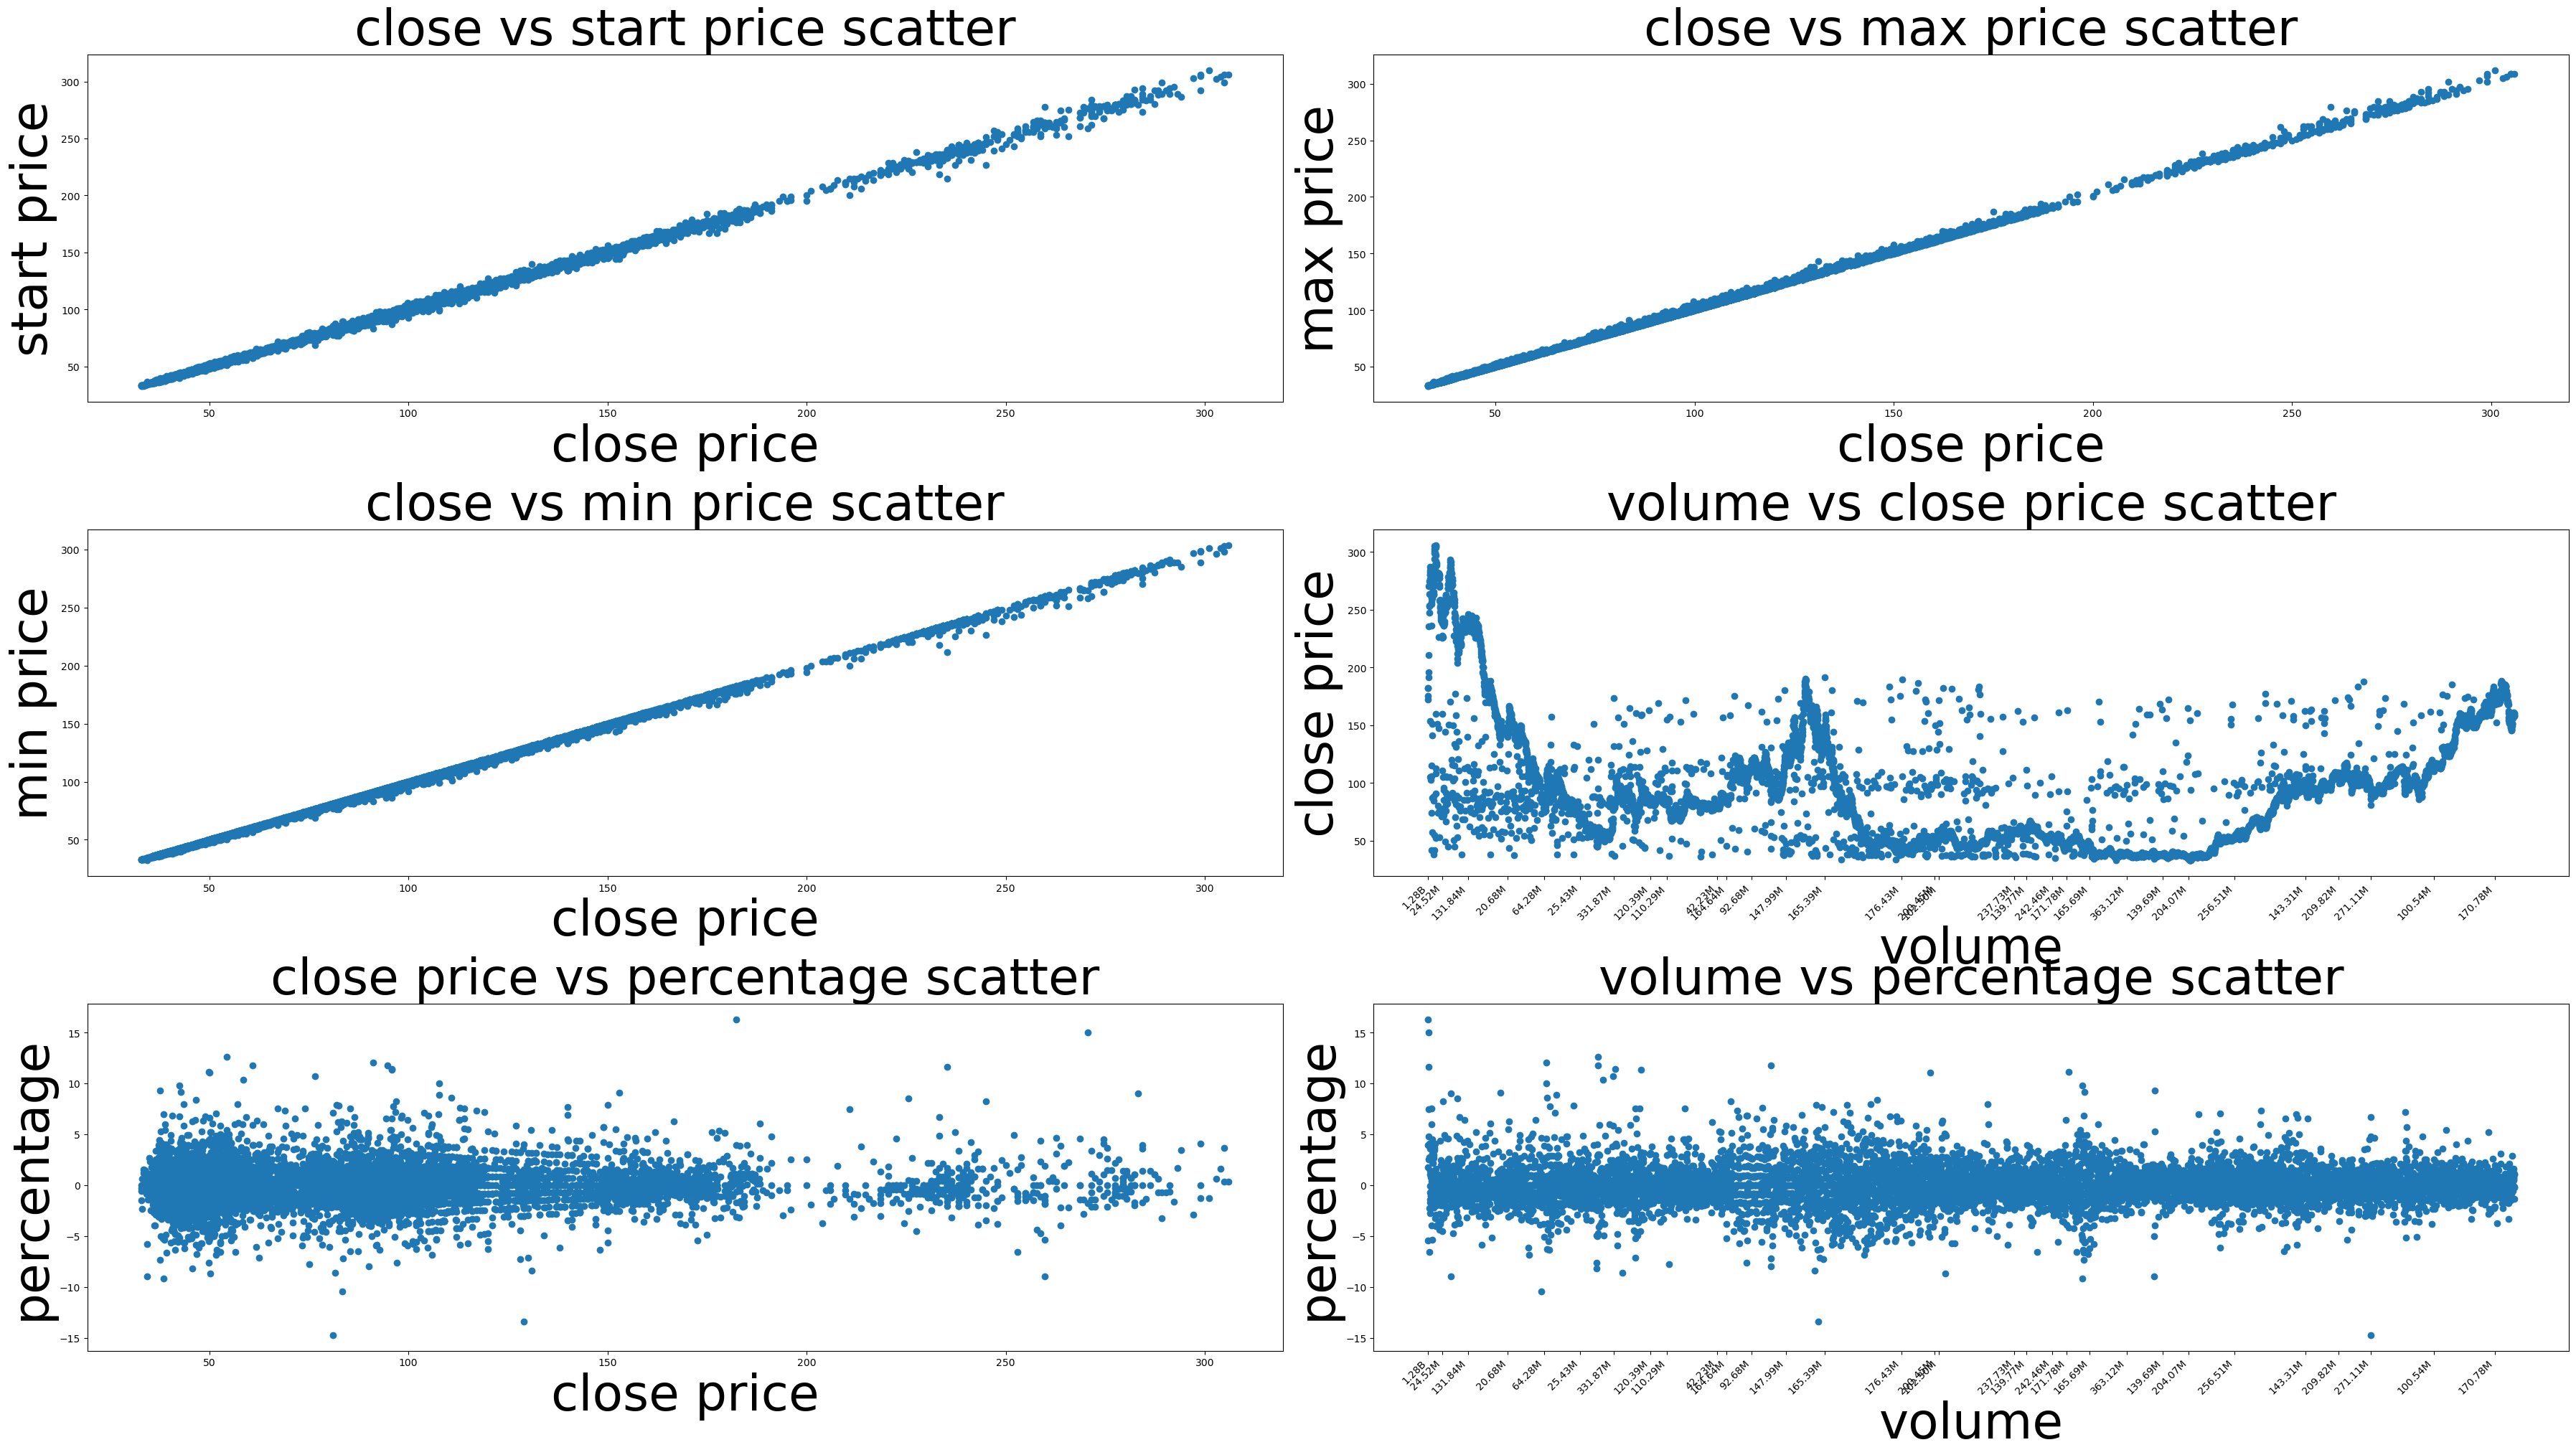

In [44]:
draw_scatter_of_stock_data(df) # 各データの相関確認

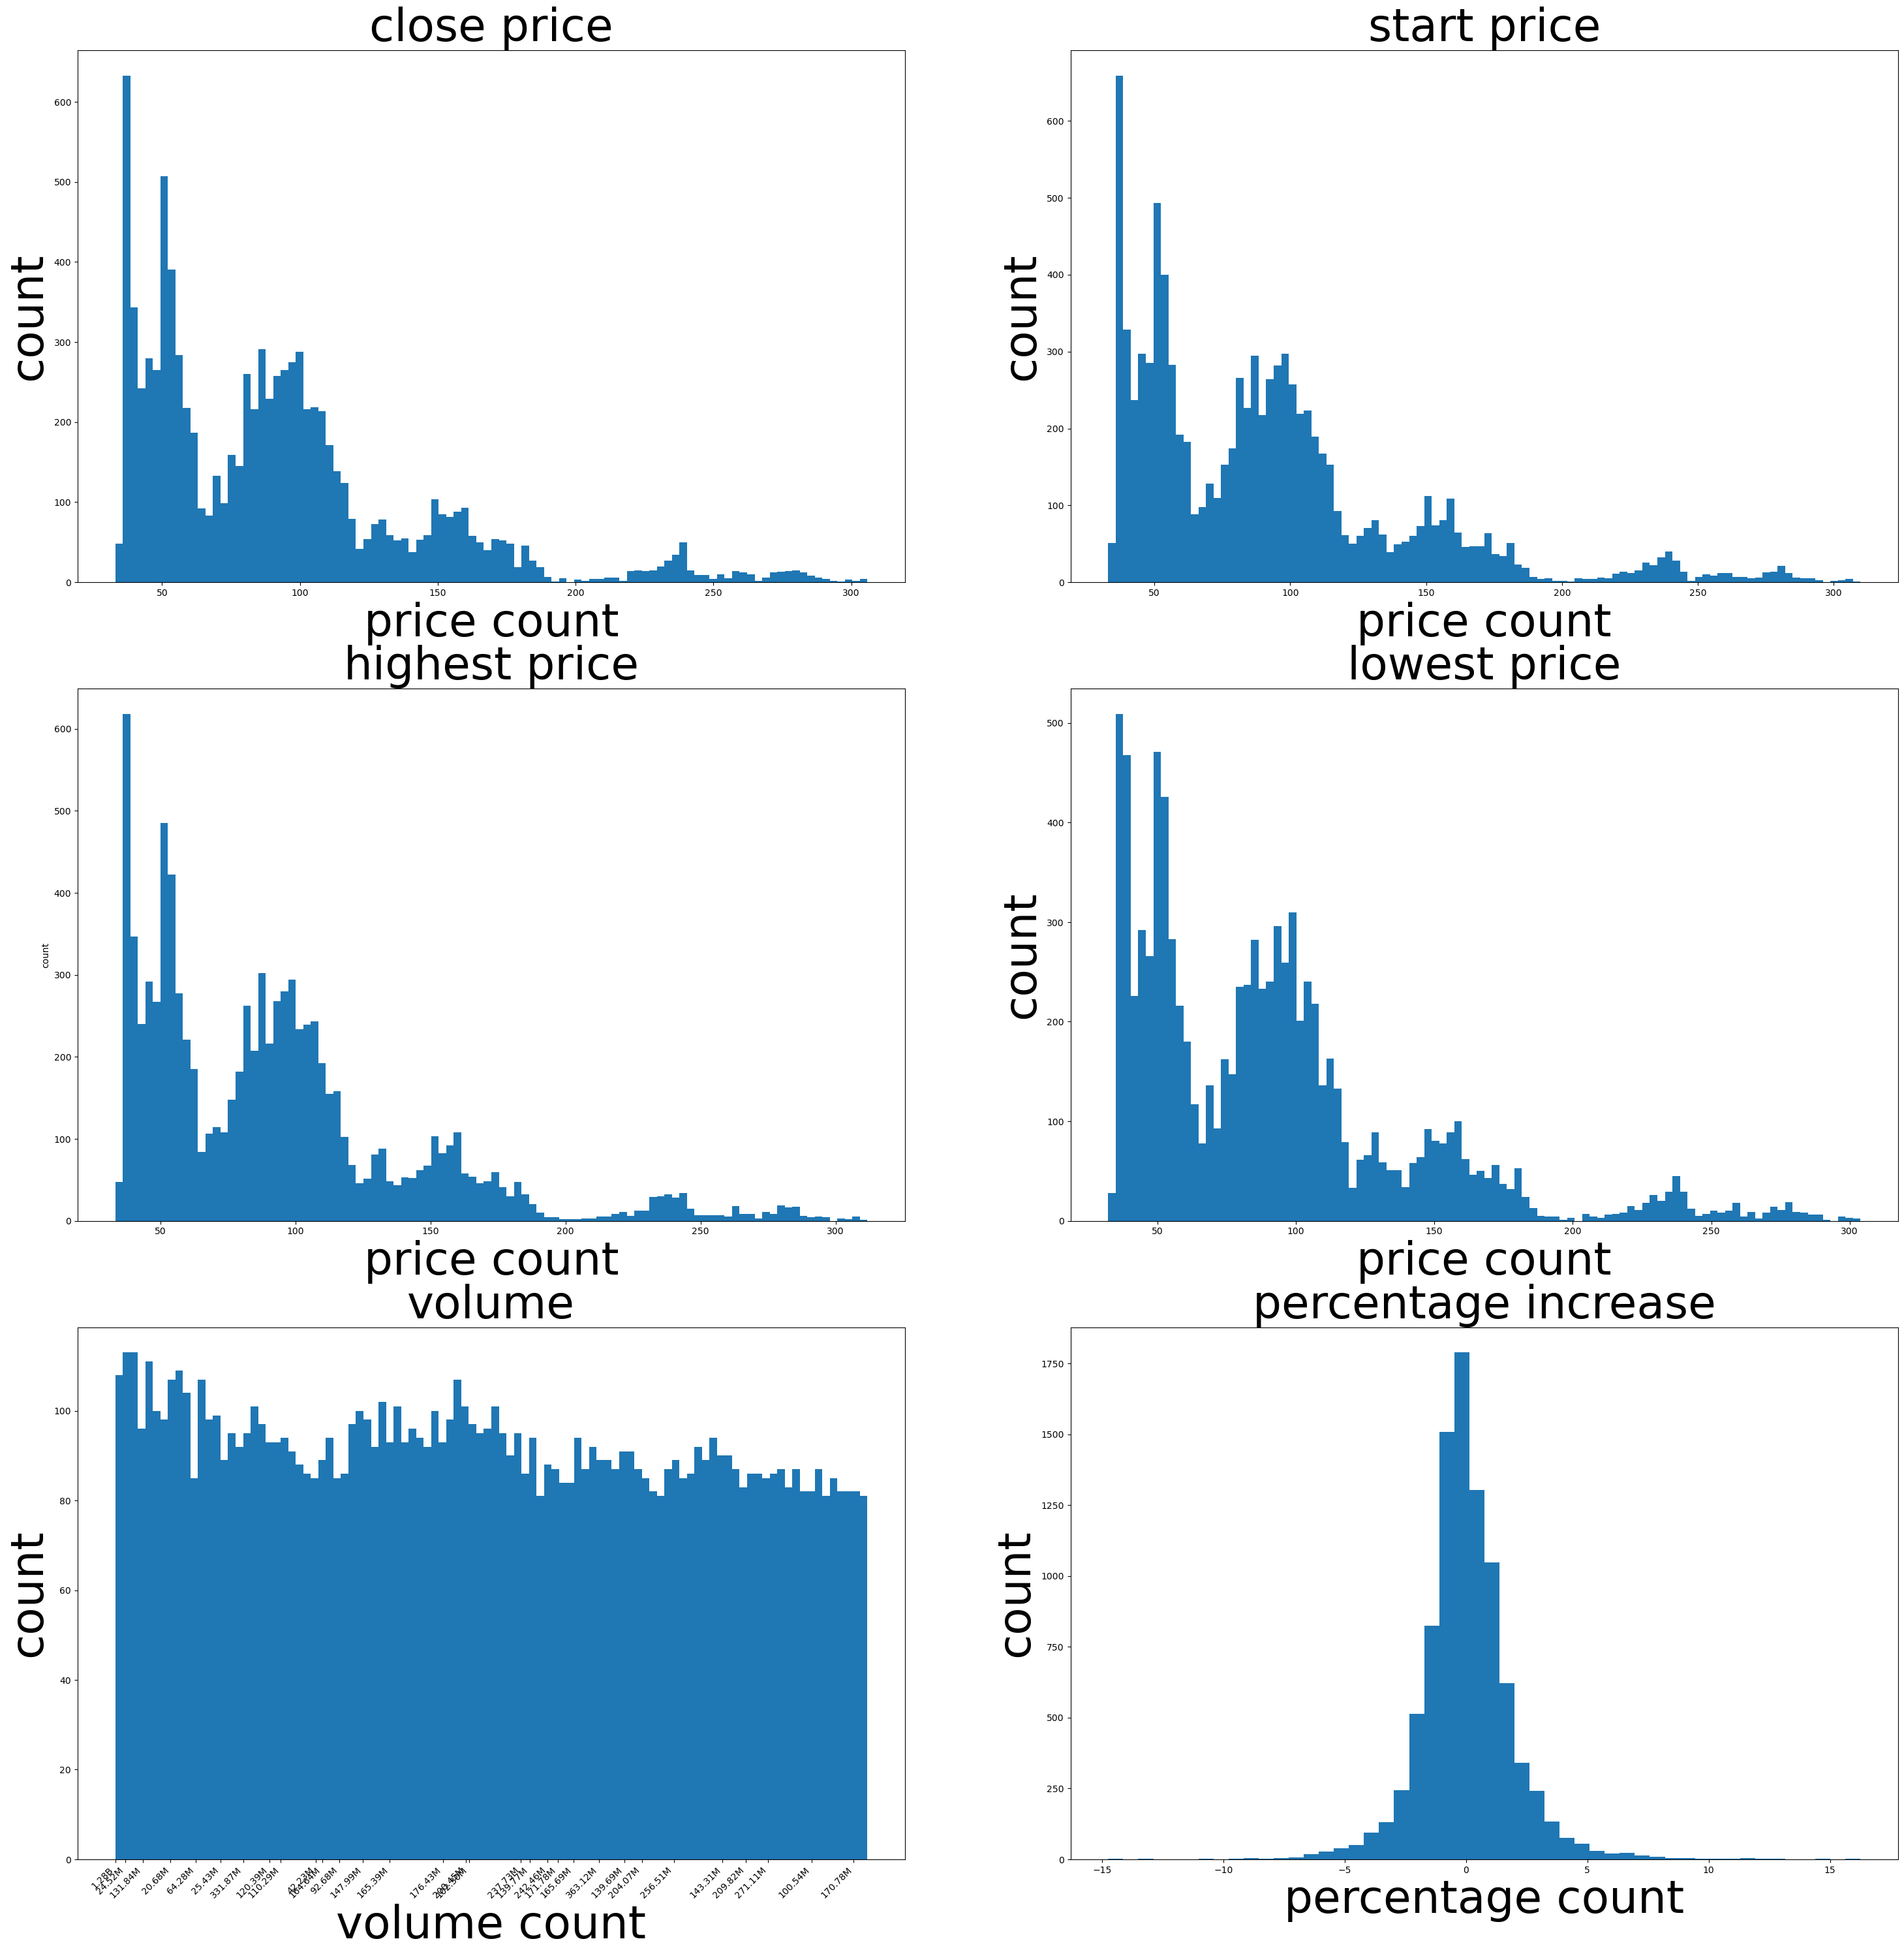

In [69]:
draw_stock_hist(df) #ストックのヒストデータ

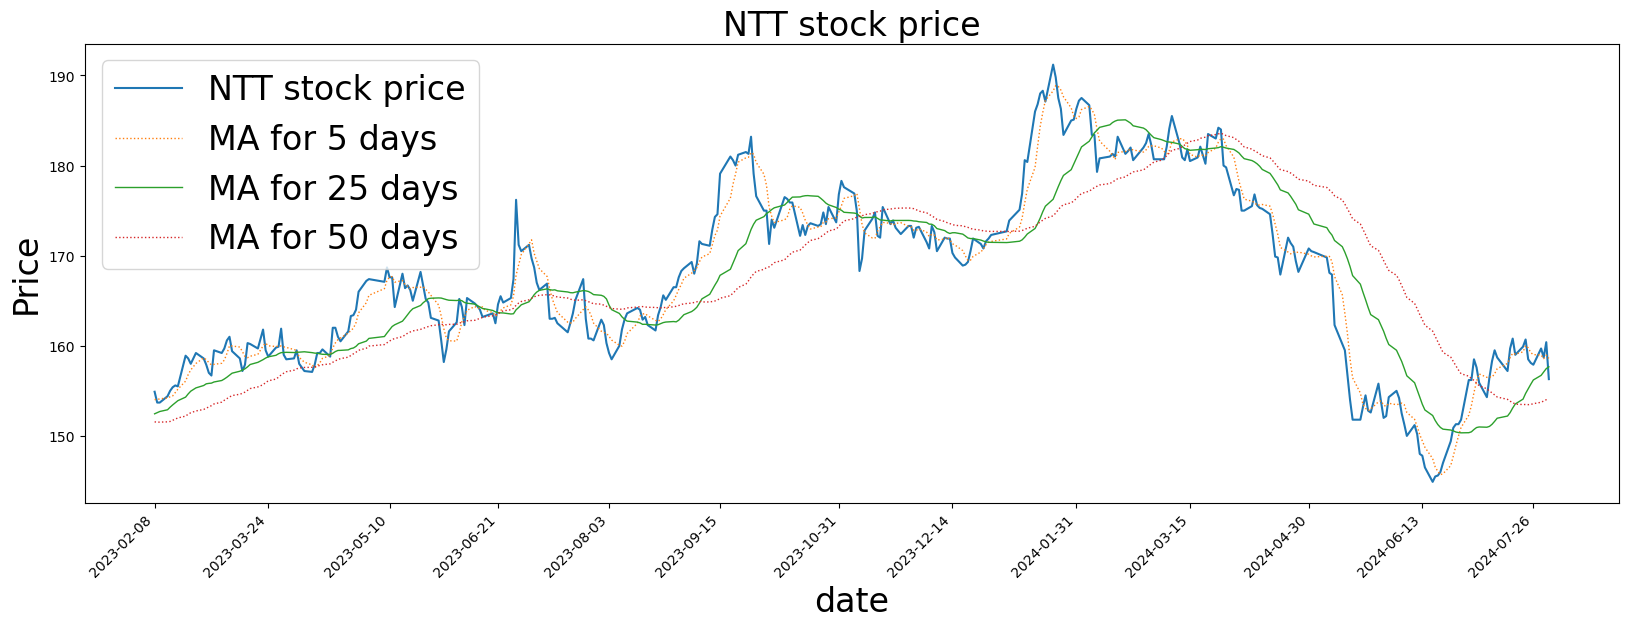

In [63]:
plot_days =365
draw_mean_stock(df,plot_days) #移動平均線と株価の１年分の描画によるトレンドの確認

           percentage
January      2.586648
February     8.470914
March        7.557337
April        4.402564
May          4.792225
June         2.398034
July         5.134402
August      -7.411043
September   -9.633609
October      2.853129
November    -1.324658
December     0.896053


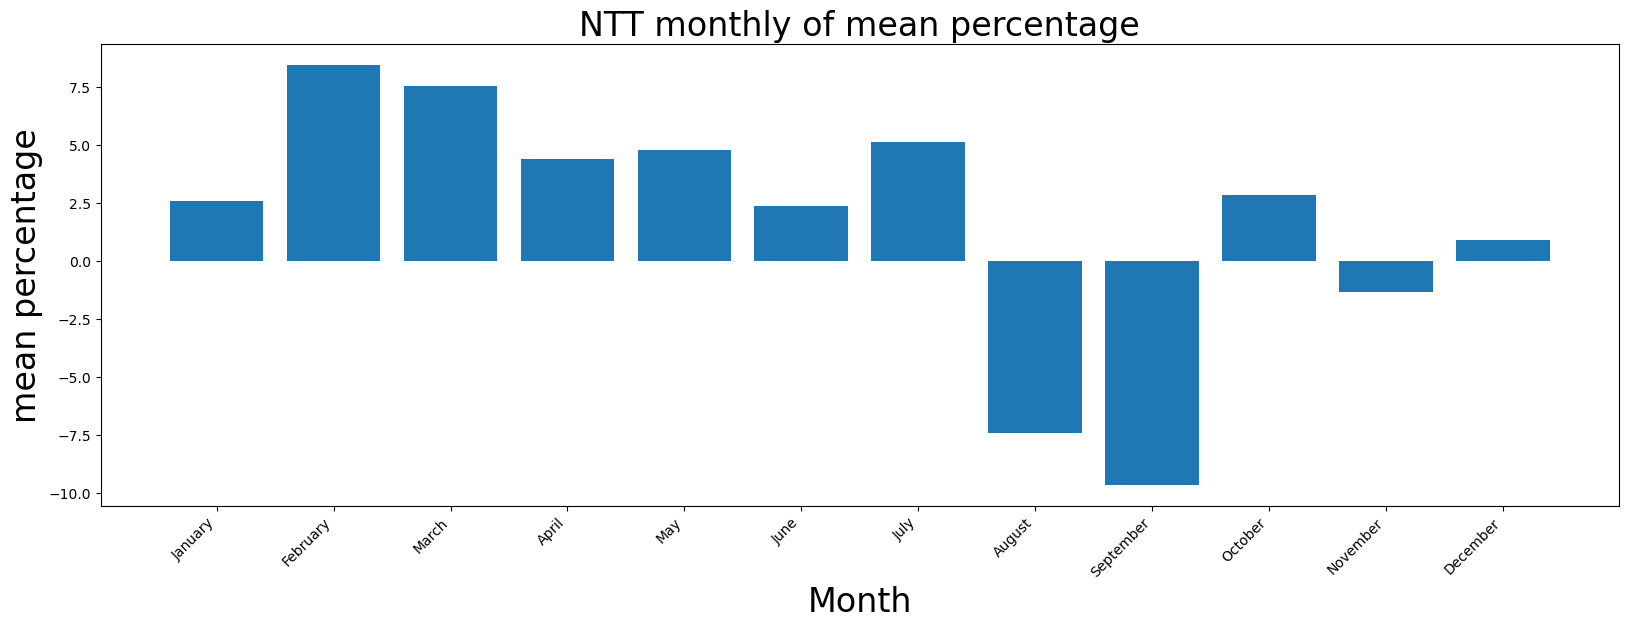

In [64]:
calc_monthly_mean_percentage(df)# 月ごとの変化率の平均値算出

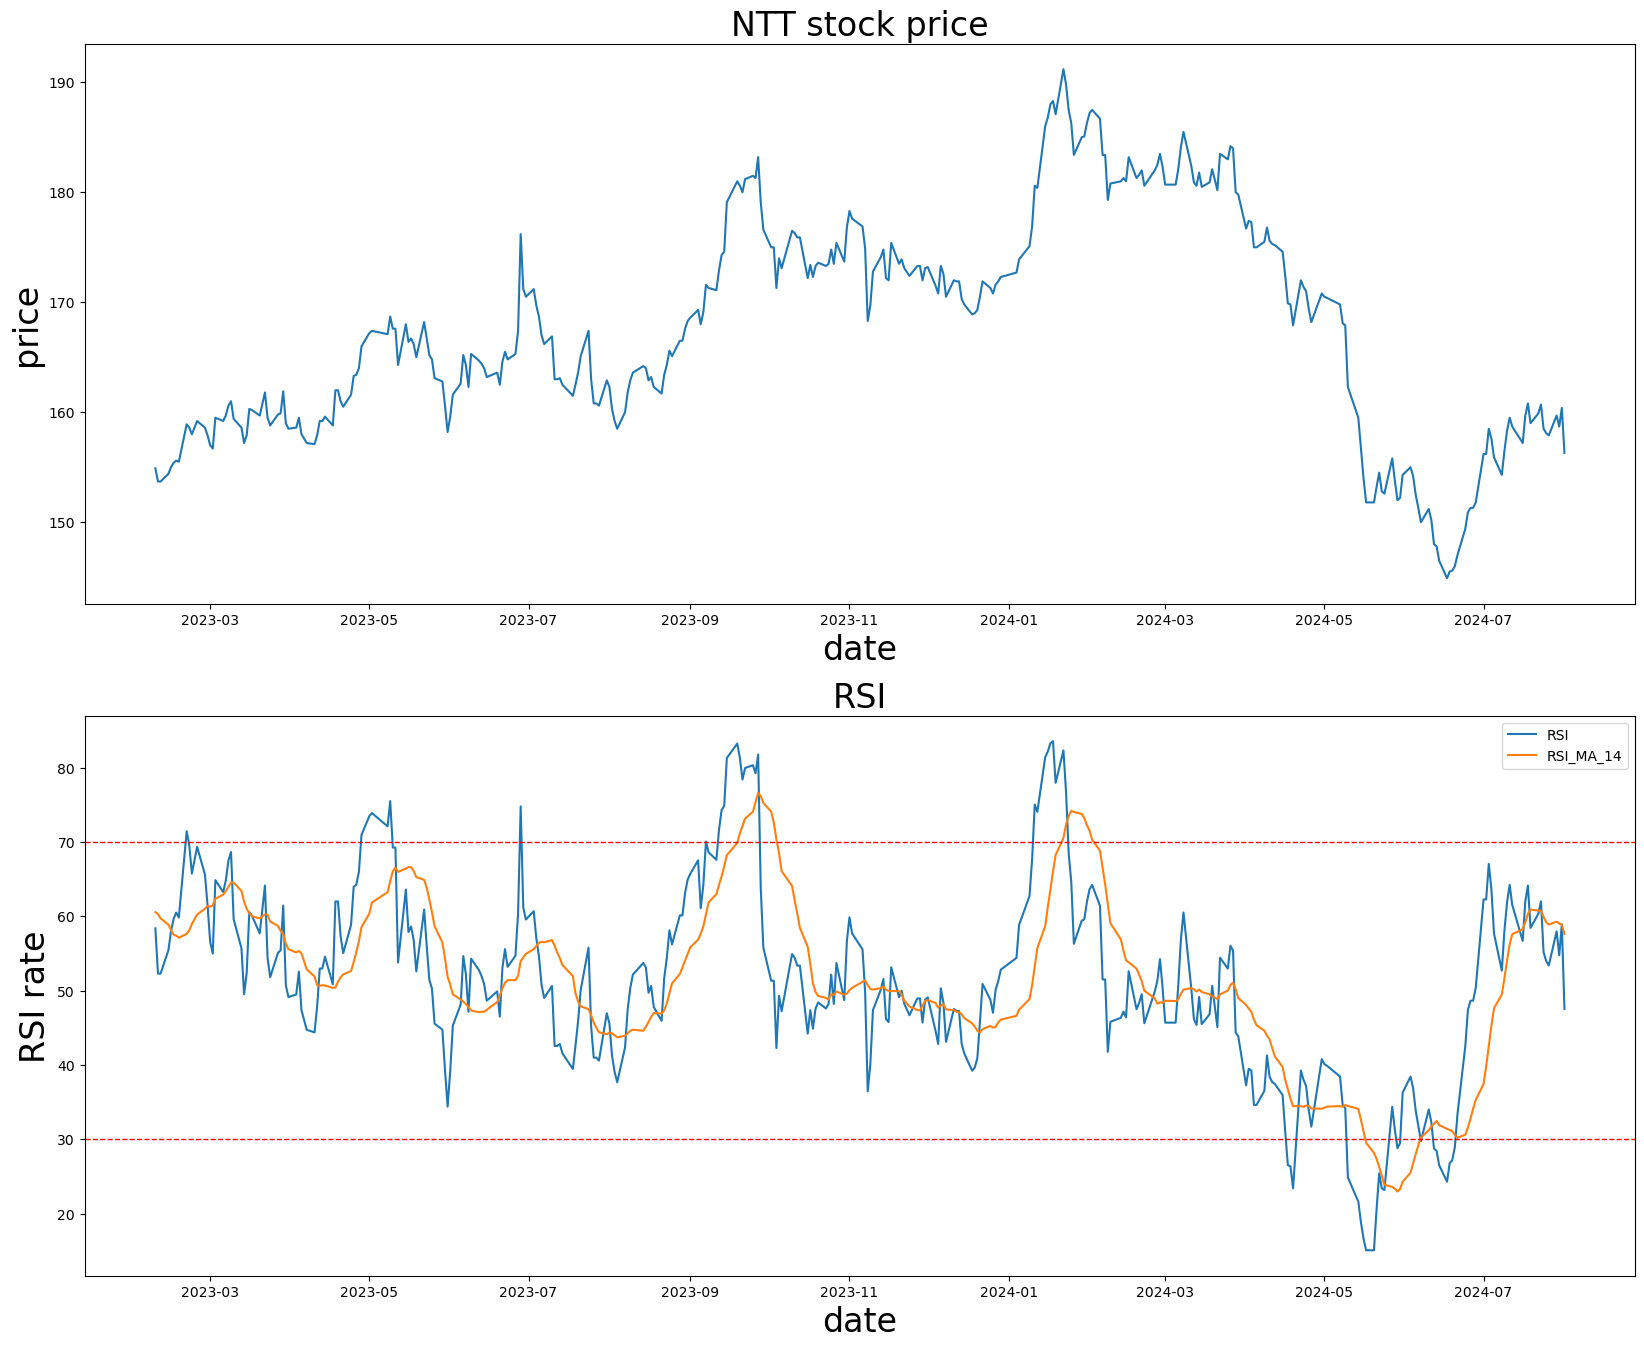

In [65]:
calc_rsi(df)# RSIによる異常値の検出